In [1]:
import pandas as pd

from utils.notebook_setup import setup_notebook_env, load_env_variables

In [2]:
setup_notebook_env()
load_env_variables()

In [3]:
from shared.database import connect_to_db
from machine_learning.analysis.mlb_time_series import (
    TeamTimeSeriesAnalyzer,
    MomentumAnalyzer,
    RestAnalyzer
)
from machine_learning.analysis.mlb_visualization import TimeSeriesVisualizer

session = connect_to_db()

In [4]:
teams_df = pd.read_sql_table('mlb_teams', session.bind)
schedule_df = pd.read_sql_table('mlb_schedule', session.bind)

/Users/josephbarkie/Coding/betbot/machine_learning/analysis/mlb_time_series.py:154: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return rolling_stats.groupby('rest_category')['rolling_win_pct'].mean().to_dict()


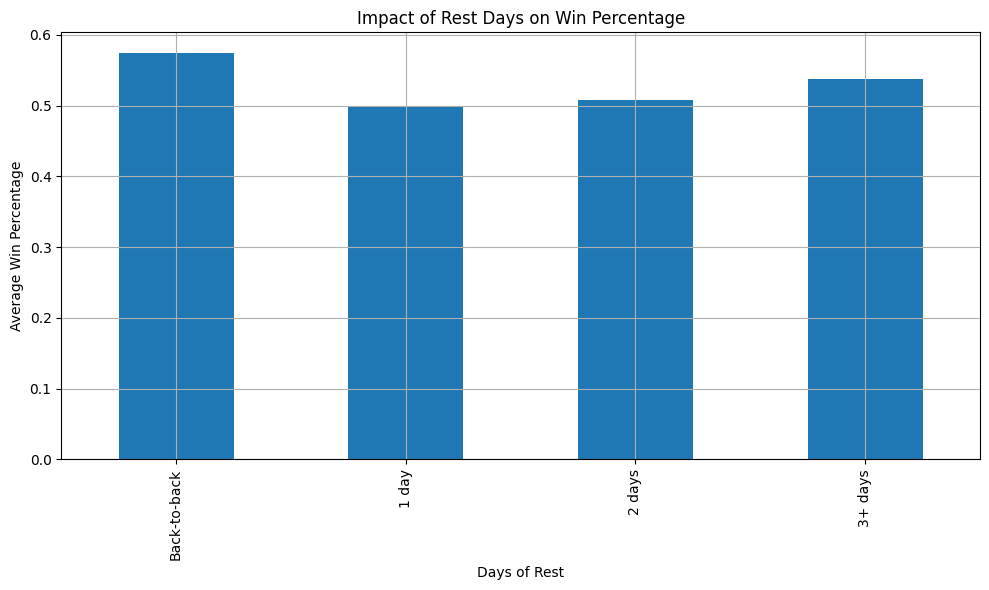

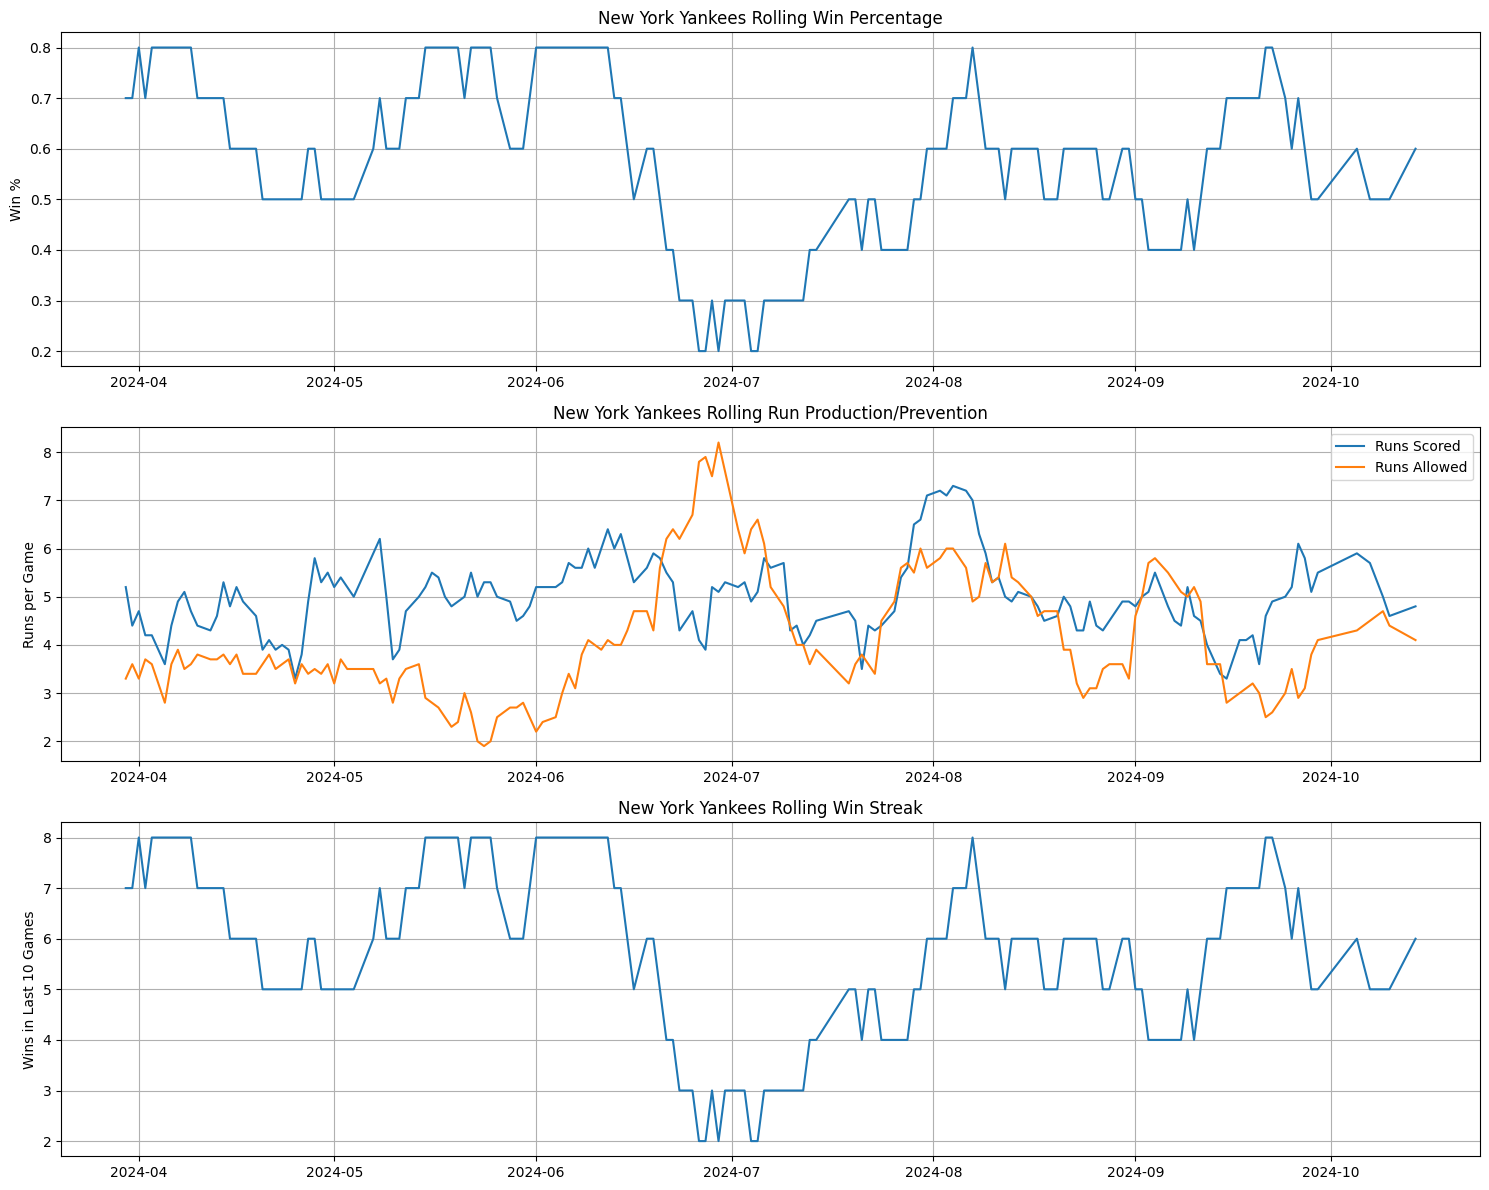

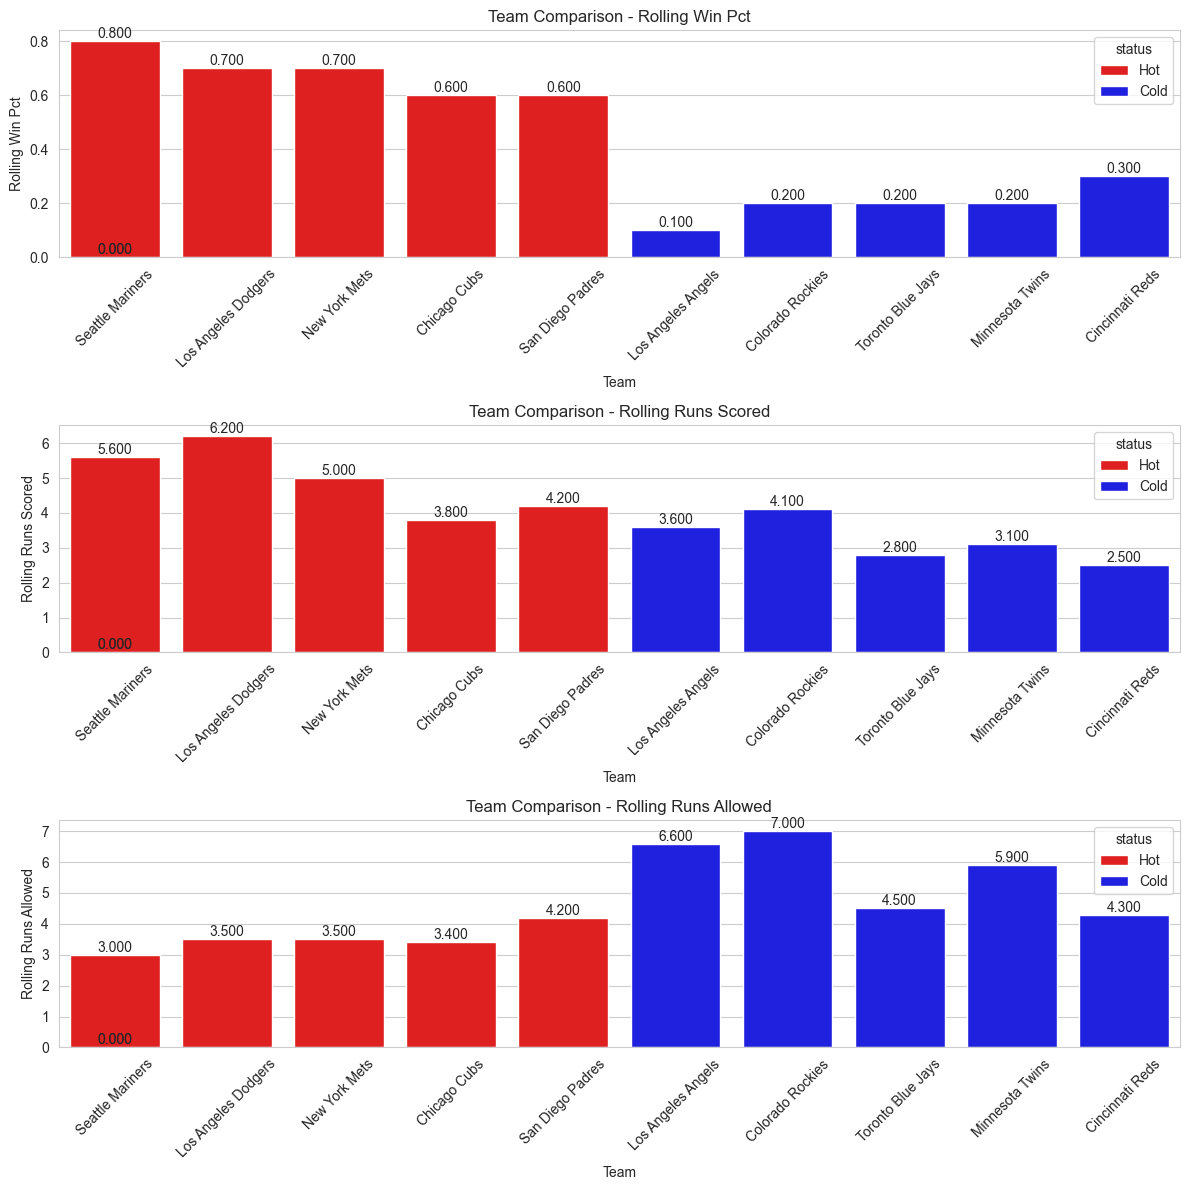


Hot Teams Summary:
               name  rolling_win_pct  rolling_runs_scored  rolling_runs_allowed
   Seattle Mariners            0.800                5.600                 3.000
Los Angeles Dodgers            0.700                6.200                 3.500
      New York Mets            0.700                5.000                 3.500
       Chicago Cubs            0.600                3.800                 3.400
   San Diego Padres            0.600                4.200                 4.200

Cold Teams Summary:
              name  rolling_win_pct  rolling_runs_scored  rolling_runs_allowed
Los Angeles Angels            0.100                3.600                 6.600
  Colorado Rockies            0.200                4.100                 7.000
 Toronto Blue Jays            0.200                2.800                 4.500
   Minnesota Twins            0.200                3.100                 5.900
   Cincinnati Reds            0.300                2.500                 4.300


In [5]:
# Initialize analyzers
team_analyzer = TeamTimeSeriesAnalyzer(window_size=10)
visualizer = TimeSeriesVisualizer()

# Calculate rolling statistics
rolling_stats = team_analyzer.calculate_rolling_stats(schedule_df, teams_df)

# Analyze rest impact
rest_impact = RestAnalyzer.calculate_rest_impact(rolling_stats)
visualizer.plot_rest_impact(rest_impact)

# Analyze specific team
visualizer.plot_team_momentum(rolling_stats, "New York Yankees", teams_df)

# Identify hot/cold teams
hot_teams, cold_teams = MomentumAnalyzer.identify_hot_cold_teams(rolling_stats, teams_df)
visualizer.plot_team_performance_comparison(hot_teams, cold_teams)